In [39]:
import numpy as np
import pandas as pd

In [40]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.rc('axes', unicode_minus=False)
plt.rc('font', family='Malgun Gothic')

### Make_moons

#### 초승달 모양 클러스터 두 개 형상의 데이터 생성
    n_samples : 표본 데이터 수
    noise : 잡음의 크기, 0이면 정확한 반원

### DecisionTreeClassifier (결정 트리 학습)

- 입력 변수를 바탕으로 목표 변수의 값을 예측하는 모델을 생성하는 것을 목표로 함.
- 각 내부 노드들은 하나의 입력 변수에, 자녀 노드들로 이어지는 가지들은 입력 변수의 가능한 값에 대응됨.

In [41]:
# 전처리
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
# Decision Tree 관련
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree


### 가상 데이터 생성

In [42]:
n_samples = 1000
random_state = 2010

feature, target = make_moons(n_samples=n_samples, noise=0.2, random_state=random_state)

In [43]:
feature.shape

(1000, 2)

In [44]:
target.sum()

500

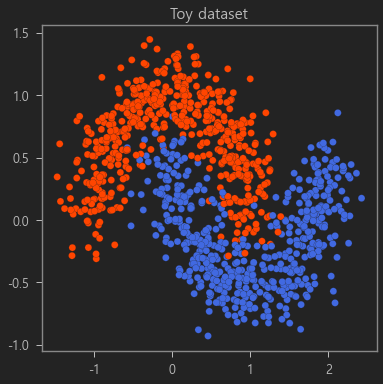

In [45]:
cmap = ListedColormap(['orangered', 'royalblue']) # 색 지정

plt.figure(figsize=(6,6))
plt.scatter(feature[:,0], feature[:,1], c=target, edgecolors='k', cmap=cmap)
plt.title('Toy dataset', fontsize = 15)
plt.show()

### 학습

In [46]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=2020)

In [47]:
# 정규화 작업
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=2020)
sc = StandardScaler() # scaler 객체 생성
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
print(X_train.shape, '/', y_train.sum())
print(X_test.shape, '/', y_test.sum())

(800, 2) / 399
(200, 2) / 101


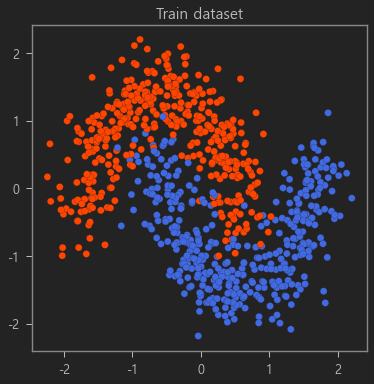

In [49]:
# Train set 시각화
plt.figure(figsize = (6,6))
plt.scatter(X_train[:,0], X_train[:,1],c=y_train, edgecolors='k', cmap=cmap)
plt.title('Train dataset', fontsize = 15)
plt.show()

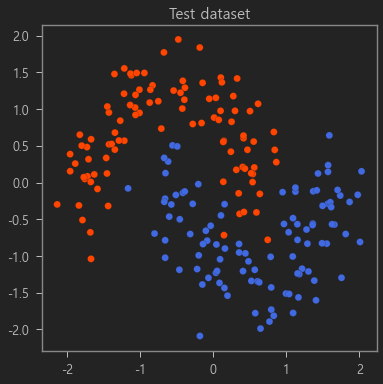

In [50]:
# test set 시각화
plt.figure(figsize=(6,6))
plt.scatter(X_test[:,0], X_test[:,1],c=y_test, edgecolors='k', cmap=cmap)
plt.title('Test dataset', fontsize=15)
plt.show()

### 학습

In [51]:
dt_clf = DecisionTreeClassifier(max_depth=3) # 분류나무 객체 생성. 깊이=3 고정.
dt_clf.fit(X_train, y_train) # 학습 데이터에 fitting

DecisionTreeClassifier(max_depth=3)

### 예측 성과 측정

In [52]:
# train accuracy, test accuracy
y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)
print('Training Accuracy: {:.4f}' .format(acc_train))
print('Test Accuracy: {:.4f}' .format(acc_test))

Training Accuracy: 0.8962
Test Accuracy: 0.9100


In [53]:
#전체 자료를 train set 기준으로 표준화
feature = sc.transform(feature) # train set 기준으로 표준화

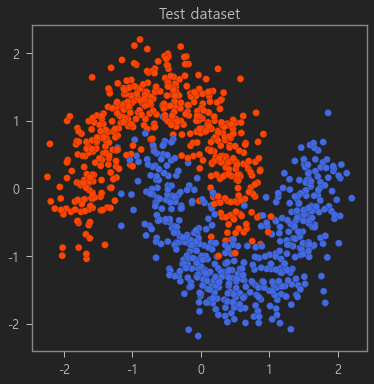

In [54]:
plt.figure(figsize=(6,6))
plt.scatter(feature[:,0], feature[:,1],c=target, edgecolors='k', cmap=cmap)
plt.title('Test dataset', fontsize=15)
plt.show()

In [55]:
# 시각화를 위한 격자 생성
xmin, xmax = feature[:,0].min() - 0.5, feature[:,0].max() + 0.5
ymin, ymax = feature[:,1].min() - 0.5, feature[:,1].max() + 0.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.02), np.arange(ymin, ymax, 0.02)) # 격자판
grid = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)]) # 각 격자점에 해당하는 (x,y) 좌표

In [56]:
# 격자 상에서의 예측 확률 값
y_pred_prob = dt_clf.predict_proba(grid)[:,1] # 1번째 class일 확률
print(y_pred_prob.shape)
z = y_pred_prob.reshape(xx.shape)
print(z.shape)

(73440,)
(270, 272)


In [57]:
y_pred_prob[75001:76000]

array([], dtype=float64)

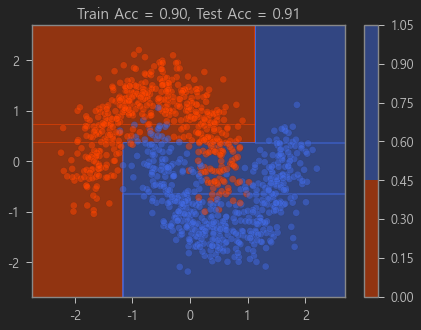

In [58]:
# train + test 자료에 대한 결과를 함께 시각화
plt.figure(figsize=(7,5))
plt.contourf(xx, yy, z, alpha=0.5, cmap=cmap)
plt.colorbar()
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', alpha=0.5, cmap=cmap)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k', alpha=0.5, cmap=cmap)
plt.title('Train Acc = {:.2f}, Test Acc = {:.2f}' .format(acc_train, acc_test), fontsize=15)
plt.show()

[0.  0.5 1. ]


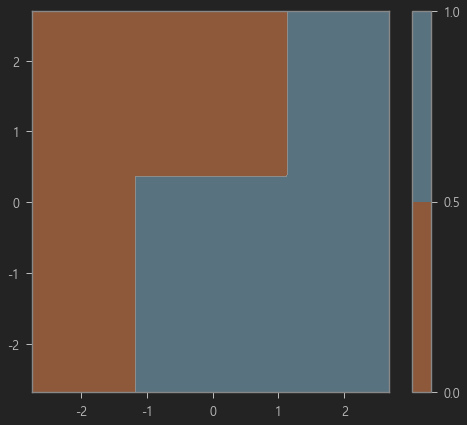

In [59]:
# plt.contourf()을 이해해보자.
levels=np.arange(0, 1.01, 0.5) # range 간격을 바꿔가며 실행해보기
print(levels)
plt.contourf(xx, yy, z, levels=levels, alpha=0.5, cmap='RdYlBu')
plt.colorbar()
plt.show()

### 나무 형태 시각화

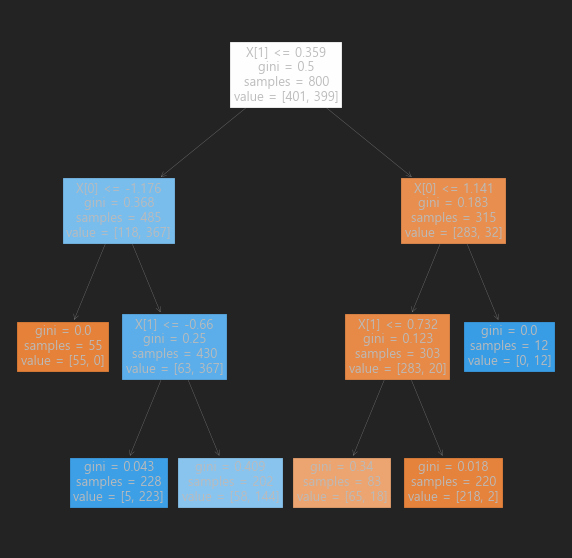

In [60]:
plt.figure(figsize=(10,10))
plot_tree(decision_tree=dt_clf, filled=True) # filled=True: node에 채색
plt.show()

### Tree의 깊이(max_depth)에 따른 예측결과 변화


max_depth : 1
train_score : 0.25
test_score : 0.28

max_depth : 2
train_score : 0.585
test_score : 0.64

max_depth : 3
train_score : 0.585
test_score : 0.64

max_depth : 4
train_score : 0.585
test_score : 0.64

max_depth : 5
train_score : 0.88
test_score : 0.88

max_depth : None
train_score : 1.0
test_score : 0.84



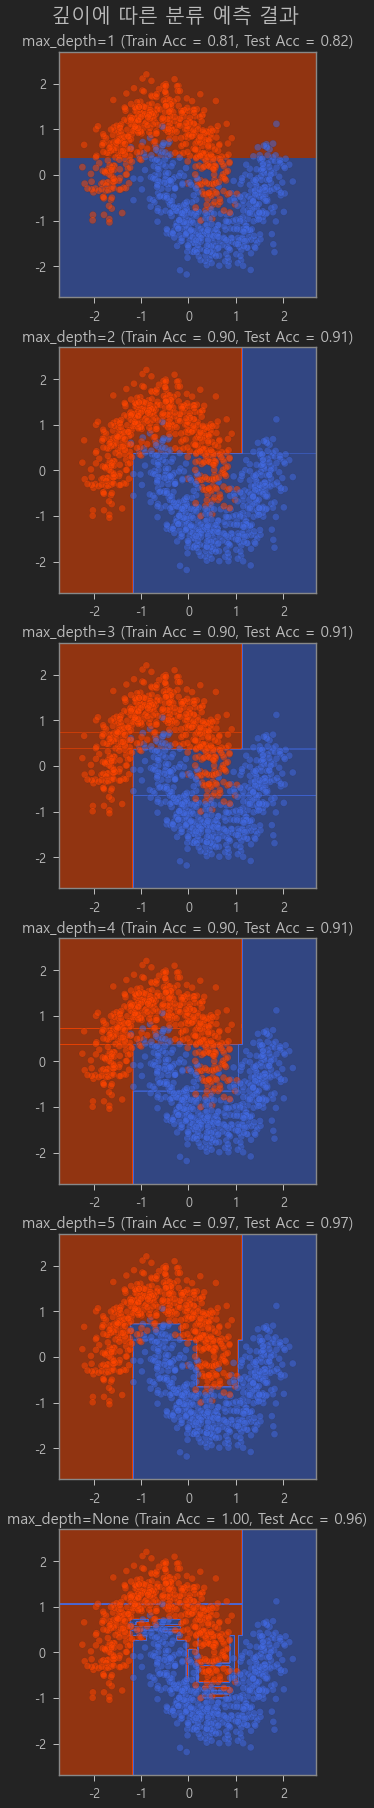

In [61]:
max_depths = [1, 2, 3, 4, 5, None]
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(4,25), constrained_layout=True)

r2_train = []
r2_test = []

for i, max_depth in enumerate(max_depths):
 # 학습(fitting)
    dt_clf = DecisionTreeClassifier(max_depth=max_depth) # DT모델 객채 생성
    dt_clf.fit(X_train, y_train)
 
# 예측
    y_train_pred = dt_clf.predict(X_train)
    y_test_pred = dt_clf.predict(X_test)
    
    r2_train.append(r2_score(y_train, y_train_pred)) # 결정 계수 회귀 점수
    r2_test.append(r2_score(y_test, y_test_pred))
    
    print('max_depth :', max_depth)
    print('train_score :', round(r2_score(y_train, y_train_pred),3))
    print('test_score :', round(r2_score(y_test, y_test_pred),3))
    print('')
    
# 정확도
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)
 # 격자 상에서의 예측확률 값(시각화 준비)
    y_pred_prob = dt_clf.predict_proba(grid)[:,1]
    z = y_pred_prob.reshape(xx.shape)
 # 특성공간에 시각화
    axs[i].contourf(xx, yy, z, alpha=0.5, cmap=cmap)
    axs[i].scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolors='k', alpha=0.5, cmap=cmap)
    axs[i].scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k', alpha=0.5, cmap=cmap)
    axs[i].set_title('max_depth={:} (Train Acc = {:.2f}, Test Acc = {:.2f})' .format(max_depth
, acc_train, acc_test), fontsize=15)
fig.suptitle('깊이에 따른 분류 예측 결과', fontsize=20)
plt.show()


### 정확도 분석 

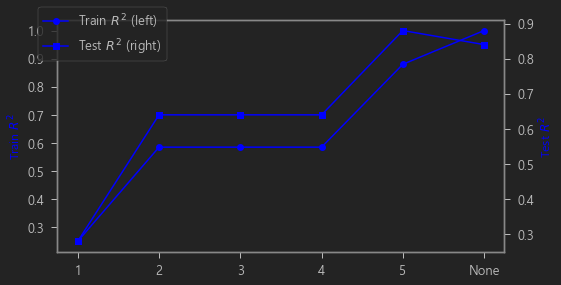

In [62]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(range(len(max_depths)), r2_train, color='blue', marker='o', label='Train $R^2$ (left)')
ax.set_ylabel('Train $R^2$', color='blue', fontsize=12)
ax2 = ax.twinx()
ax2.plot(range(len(max_depths)), r2_test, color='blue', marker='s', label='Test $R^2$ (right)')
ax2.set_ylabel('Test $R^2$', color='blue', fontsize=12)
xticks = list(map(str, max_depths)) # 가로축 표시를 문자열화
plt.xticks(range(len(max_depths)), xticks)
fig.legend(loc='lower center', bbox_to_anchor=(0.19,0.78))
fig.tight_layout()
plt.show()


### Regression Tree

In [63]:
# 데이터셋 생성
n_samples = 1000 # 표본 크기
random_state = 2010 # seed
np.random.seed(random_state) # seed 고정
X = np.random.rand(n_samples)*10 # U(0,1) 난수
X = np.sort(X, axis=0) # 오름차순 정렬
y = np.sin(X) + 0.5*np.random.randn(n_samples)

In [64]:
print(X.shape)
print(y.shape)

(1000,)
(1000,)


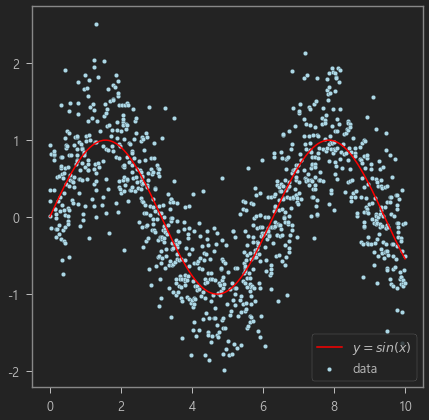

In [65]:
# 시각화
plt.figure(figsize=(7,7))
plt.scatter(X, y, s=20, edgecolor='black', c='lightblue', label='data')
plt.plot(X, np.sin(X), c='red', label='$y=sin(x)$')
plt.legend(loc='lower right')
plt.show()


In [66]:
# 자료 분할: training set, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [67]:
# 시각화를 고려하여 각 분할 자료를 X 기준으로 정렬
sort_idx = np.argsort(X_train, axis=0) # 정렬 전 index의 X 기준 정렬 후 위치
X_train, y_train = X_train[sort_idx], y_train[sort_idx]
sort_idx = np.argsort(X_test, axis=0) # 정렬 전 index의 X 기준 정렬 후 위치
X_test, y_test = X_test[sort_idx], y_test[sort_idx]

In [68]:
# 분할된 자료 확인
print(X_train.shape)
print(X_test.shape)


(800,)
(200,)


In [69]:
# sklearn.tree의 객체에서 사용하기 위해 X를 2차원화
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
print(X_train.shape)
print(X_test.shape)

(800, 1)
(200, 1)


In [70]:
# 학습(fitting)
dt_reg = DecisionTreeRegressor(max_depth=None) # 분류나무 객체 생성. 깊이=None.
dt_reg.fit(X_train, y_train) # 학습 데이터에 fitting. X_train은 2차원 이어야 함.


DecisionTreeRegressor()

### 예측 성과 측정

In [71]:
# train accuracy, test accuracy
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('Training R2: {:.4f}' .format(r2_train))
print('Test R2: {:.4f}' .format(r2_test))


Training R2: 1.0000
Test R2: 0.2118


### 예측 결과 시각화

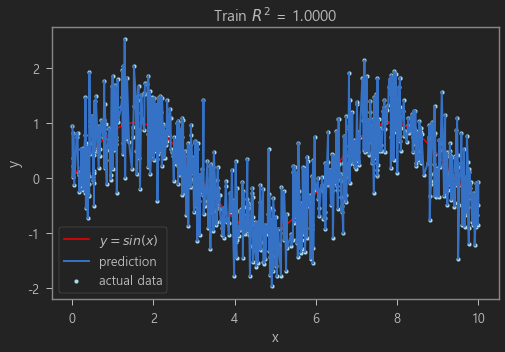

In [72]:
# train set에 대한 예측 결과 시각화
plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, s=20, edgecolor='black', c='lightblue', label='actual data')
plt.plot(X, np.sin(X), c='red', label='$y=sin(x)$')
plt.plot(X_train, y_train_pred, linewidth=2, label='prediction')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train $R^2$ = {:.4f}'.format(r2_train), fontsize=15)
plt.show()

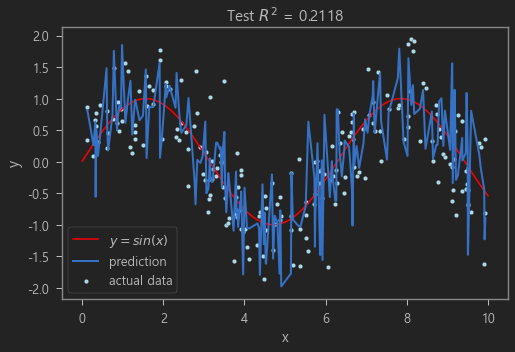

In [73]:
# test set에 대한 예측 결과 시각화
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, s=20, edgecolor='black', c='lightblue', label='actual data')
plt.plot(X, np.sin(X), c='red', label='$y=sin(x)$')
plt.plot(X_test, y_test_pred, linewidth=2, label='prediction')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test $R^2$ = {:.4f}'.format(r2_test), fontsize=15)
plt.show()


### Tree의 깊이에 따른 예측결과 변화

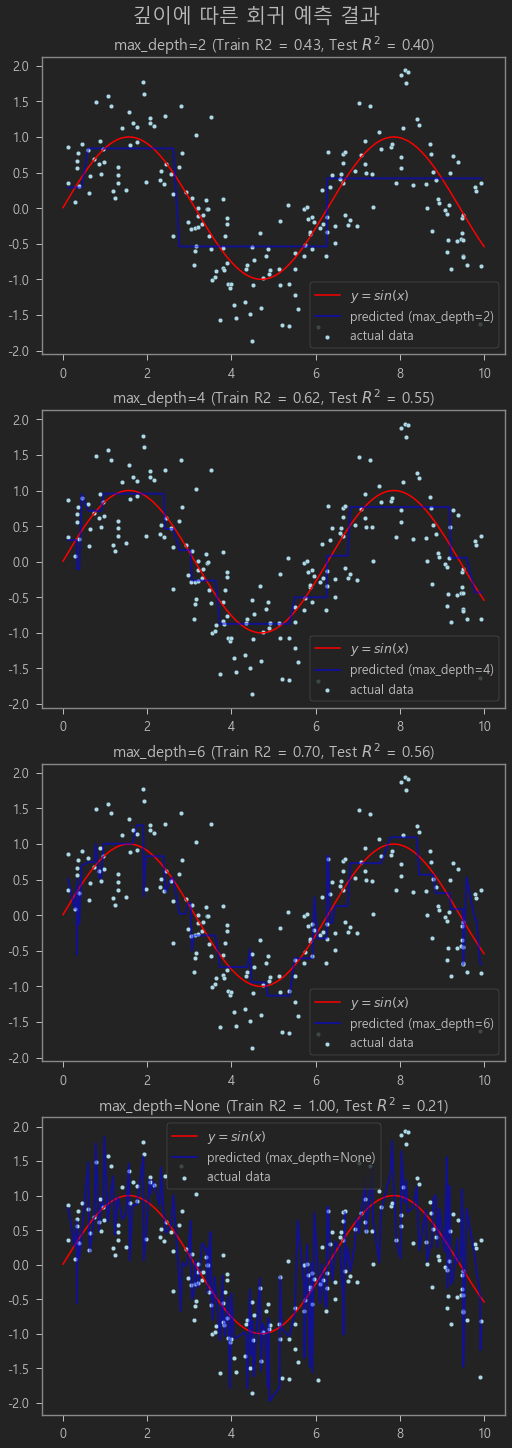

In [74]:
max_depths = [2, 4, 6, None] # 바꿔가며 실행해보기
fig, axs = plt.subplots(nrows=len(max_depths), ncols=1, figsize=(7,20), constrained_layout=True)
r2_train = []
r2_test = []
for i, max_depth in enumerate(max_depths):
 # 학습(fitting)
 dt_reg = DecisionTreeRegressor(max_depth=max_depth) # DT모델 객채 생성
 dt_reg.fit(X_train, y_train)
 
 # 예측
 y_train_pred = dt_reg.predict(X_train)
 y_test_pred = dt_reg.predict(X_test)
 # R2
 r2_train.append(r2_score(y_train, y_train_pred))
 r2_test.append(r2_score(y_test, y_test_pred))
 
 # 시각화
 axs[i].scatter(X_test, y_test, s=20, edgecolor='black', c='lightblue', label='actual data')
 axs[i].plot(X, np.sin(X), c='red', label='$y=sin(x)$')
 axs[i].plot(X_test, y_test_pred, c='blue', label='predicted (max_depth={})'.format(max_depth
), linewidth=2, alpha=0.5)
 axs[i].legend()
 axs[i].set_title('max_depth={:} (Train R2 = {:.2f}, Test $R^2$ = {:.2f})'
 .format(max_depth, r2_train[i], r2_test[i]), fontsize=15)
fig.suptitle('깊이에 따른 회귀 예측 결과', fontsize=20)
plt.show()


### 정확도 분석

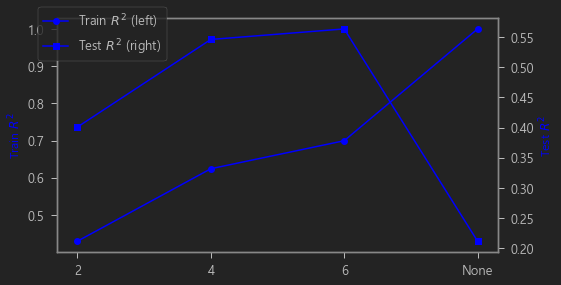

In [75]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(range(len(max_depths)), r2_train, color='blue', marker='o', label='Train $R^2$ (left)')
ax.set_ylabel('Train $R^2$', color='blue', fontsize=12)
ax2 = ax.twinx()
ax2.plot(range(len(max_depths)), r2_test, color='blue', marker='s', label='Test $R^2$ (right)')
ax2.set_ylabel('Test $R^2$', color='blue', fontsize=12)
xticks = list(map(str, max_depths)) # 가로축 표시를 문자열화
plt.xticks(range(len(max_depths)), xticks)
fig.legend(loc='lower center', bbox_to_anchor=(0.19,0.78))
fig.tight_layout()
plt.show()


#### 결론

#### Noise가 증가함에 따라 Accuarcy는 감소하였고,
#### 각각의 Noise에서 max_depth는 어느 순간까지는 증가하였으나, 그 이후 하락하는 모습을 보임

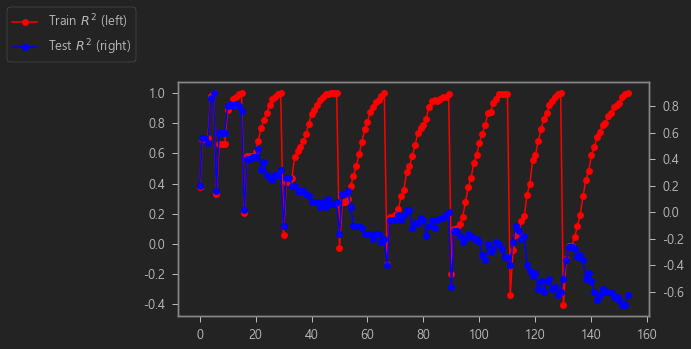

In [76]:
n_samples = 1000
random_state = 2010

r2_train_list = []
r2_test_list = []

for i in range(1,10):
    feature, target = make_moons(n_samples=n_samples, noise=i/10, random_state=random_state)
    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=random_state)
    new_dt_clf = DecisionTreeClassifier(max_depth=None) # 분류나무 객체 생성. 깊이=None 고정.
    new_dt_clf.fit(X_train, y_train)
    
    li = []
    li2 = []
    for j in range(1,new_dt_clf.get_depth()+1):
        feature, target = make_moons(n_samples=n_samples, noise=i/10, random_state=random_state)
        X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=random_state)
        new_dt_clf = DecisionTreeClassifier(max_depth=j)
        new_dt_clf.fit(X_train, y_train)
        
        y_train_pred = new_dt_clf.predict(X_train)
        y_test_pred = new_dt_clf.predict(X_test)
        
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        acc_train = accuracy_score(y_train, y_train_pred)
        acc_test = accuracy_score(y_test, y_test_pred)
        
        r2_train_list.append(r2_train)
        r2_test_list.append(r2_test)
    
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(r2_train_list, color='red', marker='o', label='Train $R^2$ (left)')
ax2 = ax.twinx()
ax2.plot(r2_test_list, color='blue', marker='o', label='Test $R^2$ (right)')
fig.legend(loc='lower center', bbox_to_anchor=(-0.1,1))
fig.tight_layout()
plt.show()
    